In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("D://datasets//car_evaluation.csv")

In [13]:
data.head(5)

,buying,maintaince,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# data analysis

In [4]:
data.shape

(1728, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maintaince  1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   lug_boot    1728 non-null   object
 5   safetly     1728 non-null   object
 6   class       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
data.describe()

,buying,maintaince,doors,persons,lug_boot,safetly,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,big,low,unacc
freq,432,432,432,576,576,576,1210


# data wrangling

In [8]:
data.isnull().sum()

buying        0
maintaince    0
doors         0
persons       0
lug_boot      0
safetly       0
class         0
dtype: int64

In [14]:
data['buying'],_ = pd.factorize(data['buying'])
data['maintaince'],_ = pd.factorize(data['maintaince'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maintaince,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc


In [59]:
data.tail(10)

,buying,maintaince,doors,persons,lug_boot,safety,class
1718,3,3,3,1,2,2,2
1719,3,3,3,2,0,0,0
1720,3,3,3,2,0,1,1
1721,3,3,3,2,0,2,3
1722,3,3,3,2,1,0,0
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3
1727,3,3,3,2,2,2,2


In [15]:
data['class'],class_names = pd.factorize(data['class'])

In [16]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


<AxesSubplot:xlabel='class', ylabel='count'>

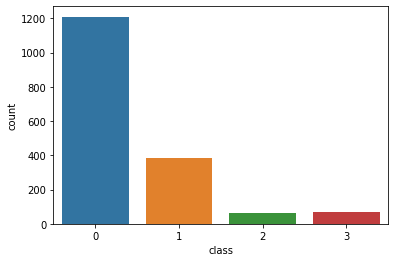

In [43]:
sns.countplot(x='class',data=data)

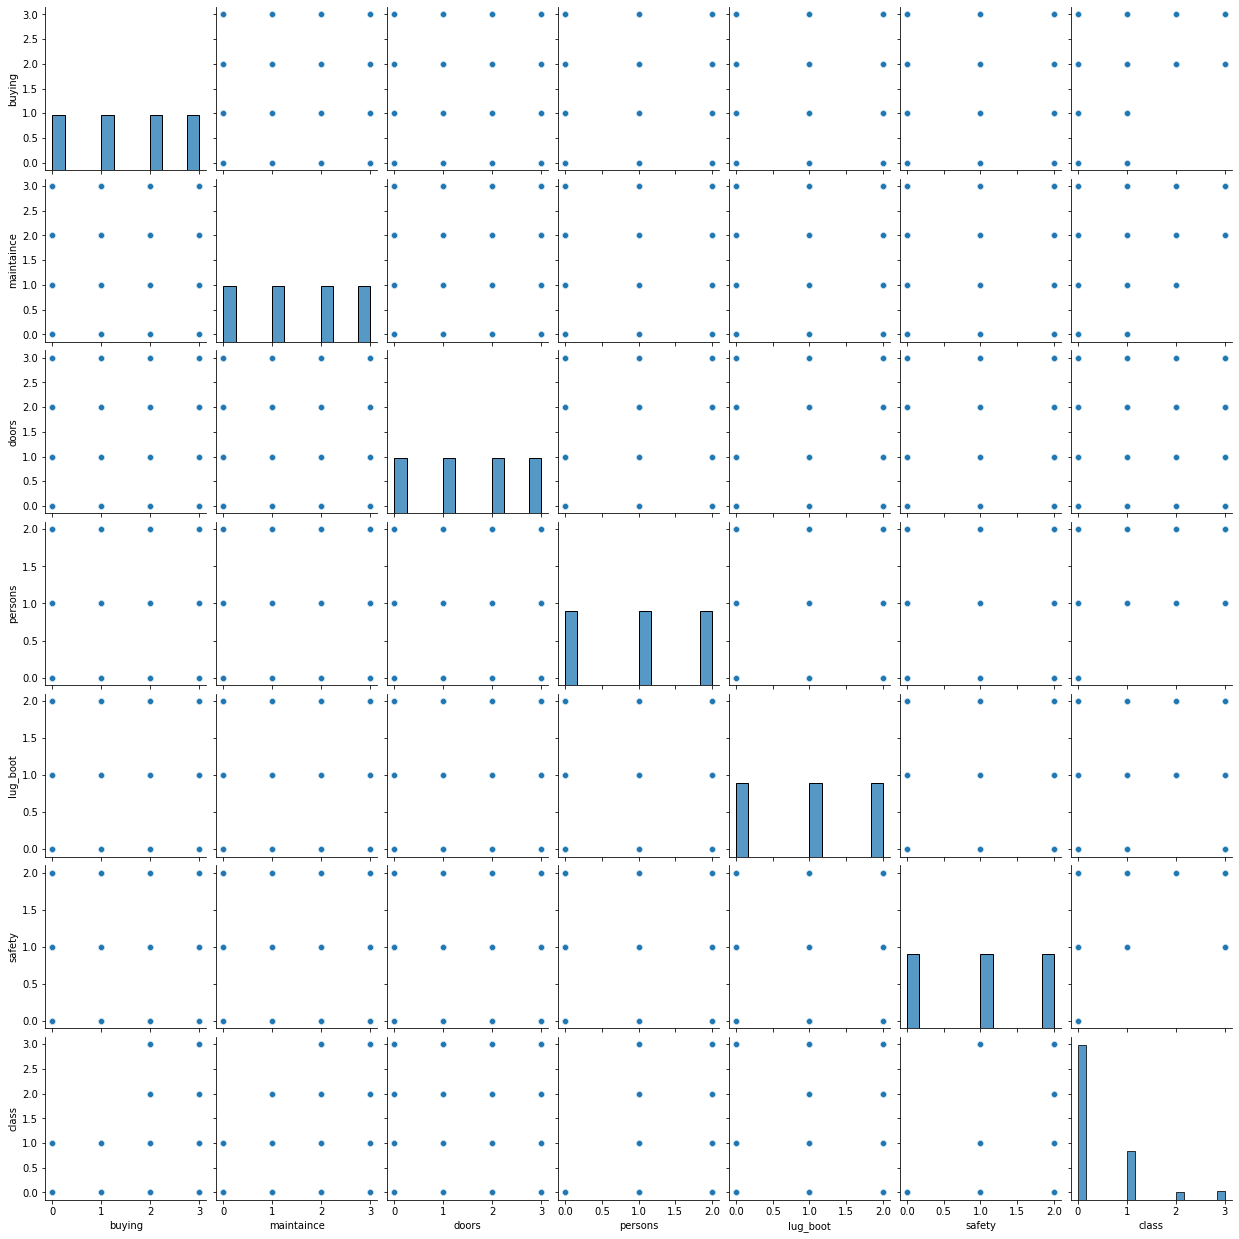

In [44]:
sns.pairplot(data)

<AxesSubplot:xlabel='class', ylabel='count'>

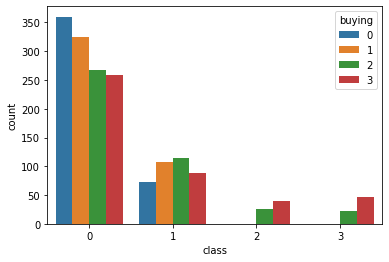

In [45]:
sns.countplot(x='class',hue="buying",data=data)

<AxesSubplot:xlabel='class', ylabel='count'>

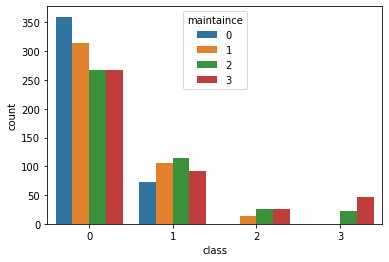

In [46]:
sns.countplot(x='class',hue="maintaince",data=data)

# data preparation

In [18]:
x=data.drop(['class'],axis=1)
y=data['class']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [38]:
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=40)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=40)

In [39]:
y_pred = classifier.predict(X_test)

In [48]:
y_pred1=classifier.predict(X_train)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8092485549132948


In [52]:
print("Accuracy:",metrics.accuracy_score(y_pred1, y_train))

Accuracy: 0.7841191066997518


In [41]:
print(confusion_matrix(y_test, y_pred))

[[354  13   0   0]
 [ 42  66   0   0]
 [  0  21   0   0]
 [  0  23   0   0]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       367
           1       0.54      0.61      0.57       108
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        23

    accuracy                           0.81       519
   macro avg       0.36      0.39      0.37       519
weighted avg       0.74      0.81      0.78       519



c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# tree visualization

[Text(130.20000000000002, 332.955, 'X[3] <= 0.5\nentropy = 1.21\nsamples = 1209\nvalue = [844, 271, 45, 49]'),
 Text(65.10000000000001, 237.825, 'entropy = 0.0\nsamples = 404\nvalue = [404, 0, 0, 0]'),
 Text(195.3, 237.825, 'X[5] <= 0.5\nentropy = 1.484\nsamples = 805\nvalue = [440, 271, 45, 49]'),
 Text(130.20000000000002, 142.695, 'entropy = 0.0\nsamples = 264\nvalue = [264, 0, 0, 0]'),
 Text(260.40000000000003, 142.695, 'X[0] <= 1.5\nentropy = 1.639\nsamples = 541\nvalue = [176, 271, 45, 49]'),
 Text(195.3, 47.565, 'entropy = 0.997\nsamples = 268\nvalue = [143, 125, 0, 0]'),
 Text(325.50000000000006, 47.565, 'entropy = 1.725\nsamples = 273\nvalue = [33, 146, 45, 49]')]

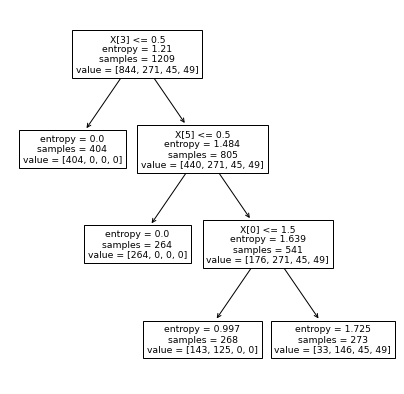

In [26]:
plt.figure(figsize=(7,7))
tree.plot_tree(classifier.fit(X_train,y_train))

# predictions

In [54]:
input1=[[0,0,0,0,0,0]]
output=classifier.predict(input1)
print(output)

[0]


In [56]:
input2=[[0,2,2,0,1,0]]
output=classifier.predict(input2)
print(output)

[0]


In [57]:
input3=[[0,2,2,2,0,0]]
output=classifier.predict(input3)
print(output)

[0]


In [68]:
input4=[[3,3,3,2,2,2]]
output4=classifier.predict(input4)
print(output4)

[1]
